<a href="https://colab.research.google.com/github/rutul7802/Prediction-Using-Supervised-ML/blob/main/Task_1_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **THE SPARKS FOUNDATION**

## **TASK 1 - Prediction using Supervised ML**

To Predict the percentage of marks of the students based on the number of hours they studied

### ***Author :- Rutul Prajapati***

## **Importing Libraries and Understands the Data**

In [1]:
#import numpy and pandas and other important Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [3]:
#Read the csv file

df = pd.read_csv("student_scores.csv")
df.head(6)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20


In [4]:
#To take the the inforation regarding data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# Check if there  is any null value in the Dataset
df.isnull == True

False

**There is no null values in to the dataset so that now we can visualise our data**

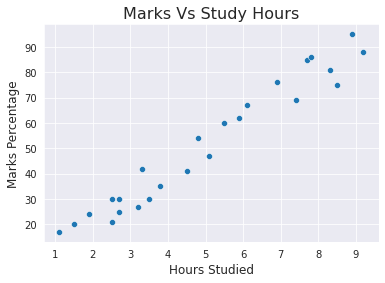

In [6]:
sns.set_style('darkgrid')
sns.scatterplot(y= df['Scores'], x= df['Hours'])
plt.title('Marks Vs Study Hours',size=16)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

**From the above scatter plot there looks to be Correlation between the 'Marks Percentage' and 'Hours Studied', Lets plot a regression line to confirm the Correlation.**

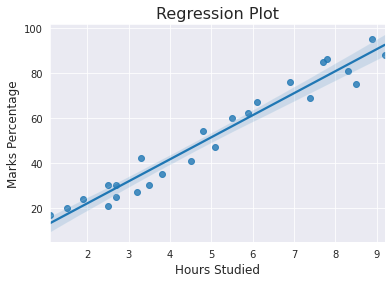

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [7]:
sns.regplot(x= df['Hours'], y= df['Scores'])
plt.title('Regression Plot',size=16)
plt.ylabel('Marks Percentage',size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(df.corr())

**It is confirmed that our Two variables are positively correlated.**



# **Now Let's Train the Model**

**1) Splitting the Data**

In [8]:
# Defining x and y from the Data
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

# Spliting the Data in two
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state = 0)

**2) Fitting the Data into Model**

In [9]:
regression = LinearRegression()
regression.fit(train_x, train_y)
print("****Model Trained****")

****Model Trained****


# **Now Let's Predict the Percentage Of Marks**

In [10]:
pred_y = regression.predict(val_x)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_x], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


# **Comparing the Predicted Marks with Actual Marks**

In [14]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks' : pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


# **Visually Comparing the Predicted Marks with Actual Marks**

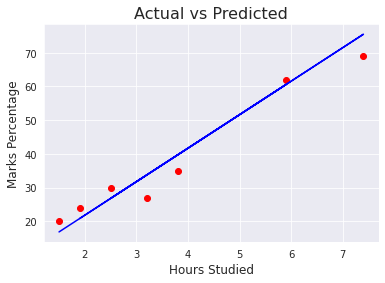

In [18]:
plt.scatter(x=val_x, y=val_y, color='red')
plt.plot(val_x, pred_y, color='Blue')
plt.title('Actual vs Predicted', size=16)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

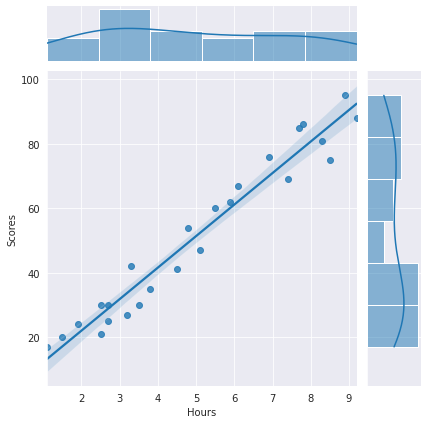

In [23]:
sns.jointplot(x=df['Hours'], y=df['Scores'], data=df, kind='reg')

# **Evaluating the Model**

In [19]:
# Calculating the Accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502482


**Small value of Mean Absolute Error states that the chances of error or wrong forecasting through the Model are very less.**





# **Let's see What will be the Predicted score of a student if he/she Studies for 9.25 hour/day?**

In [22]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893



**According to the Regression model if a Student studies for 9.25 hours a day he/she is likely to score 93.89 Marks**